In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')

In [2]:
headers = ['sepal_length','sepal_width','petal_length','petal_width','class']
iris = pd.read_csv('iris.data',names=headers)

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
iris['class'] = [i.strip().replace('Iris-','').title() for i in iris['class']]
iris['class'] = iris['class'].astype('category')

- Removing 'Iris-' from the class column and changing to category type.

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   class         150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


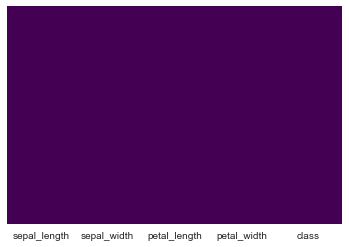

In [7]:
sns.heatmap(iris.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

- No column has null values.

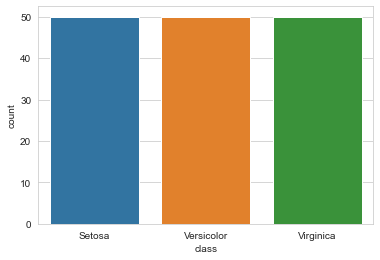

In [8]:
sns.countplot('class',data=iris)
plt.show()

- Count of each class is evenly distributed.

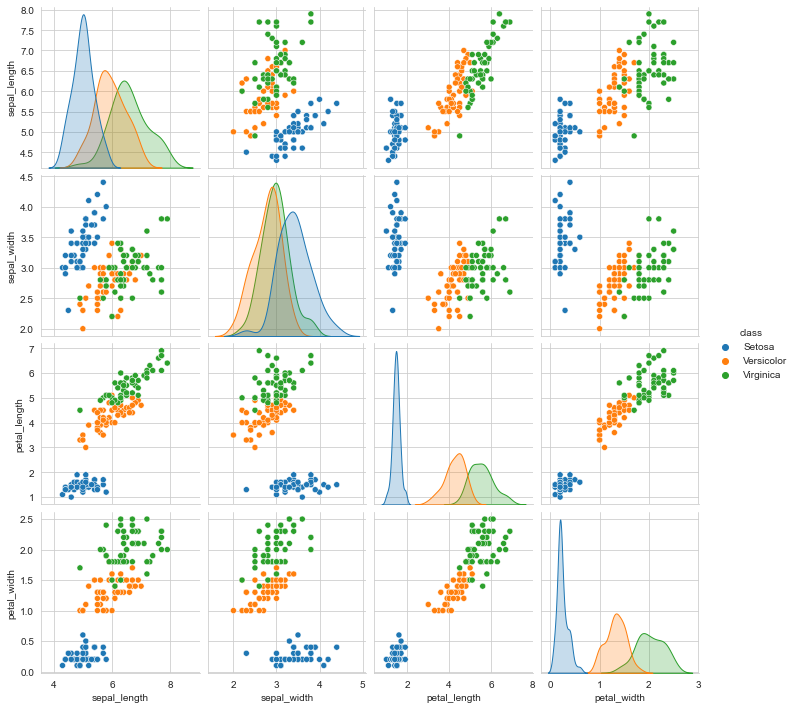

In [9]:
sns.pairplot(iris,hue='class')
plt.show()

- From the pairplot, we can see:
    - For sepal length and sepal width the classes are overlapping each other
    - For petal length and petal width the Setosa class is separated, but Versicolor and Virginica class are overlapping each other. However, the data can be linearly separated

In [10]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


- We can see sepal length and  sepal width is highly correlated with the petal length and petal width, although there is very low correlation between sepal length and sepal width

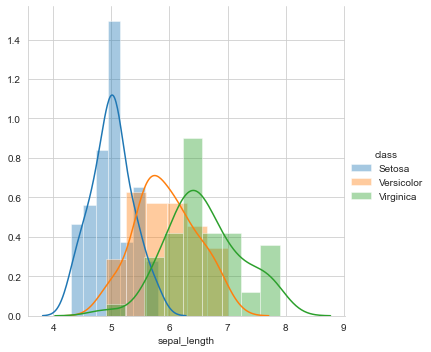

In [11]:
sns.FacetGrid(iris,hue="class",height=5).map(sns.distplot,"sepal_length").add_legend()
plt.show()

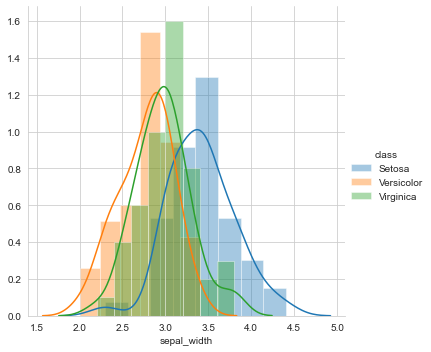

In [12]:
sns.FacetGrid(iris,hue="class",height=5).map(sns.distplot,"sepal_width").add_legend()
plt.show()

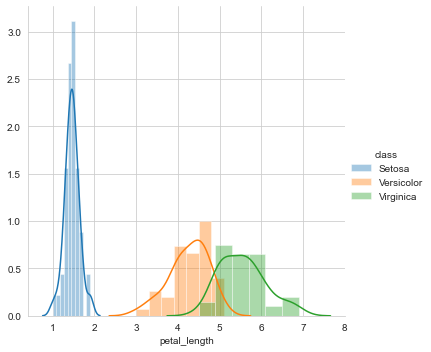

In [13]:
sns.FacetGrid(iris,hue="class",height=5).map(sns.distplot,"petal_length").add_legend()
plt.show()

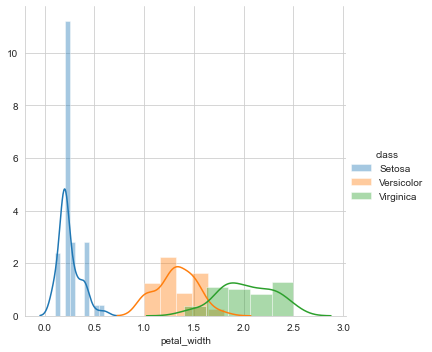

In [14]:
sns.FacetGrid(iris,hue="class",height=5).map(sns.distplot,"petal_width").add_legend()
plt.show()

- All the graphs have normal distribution.

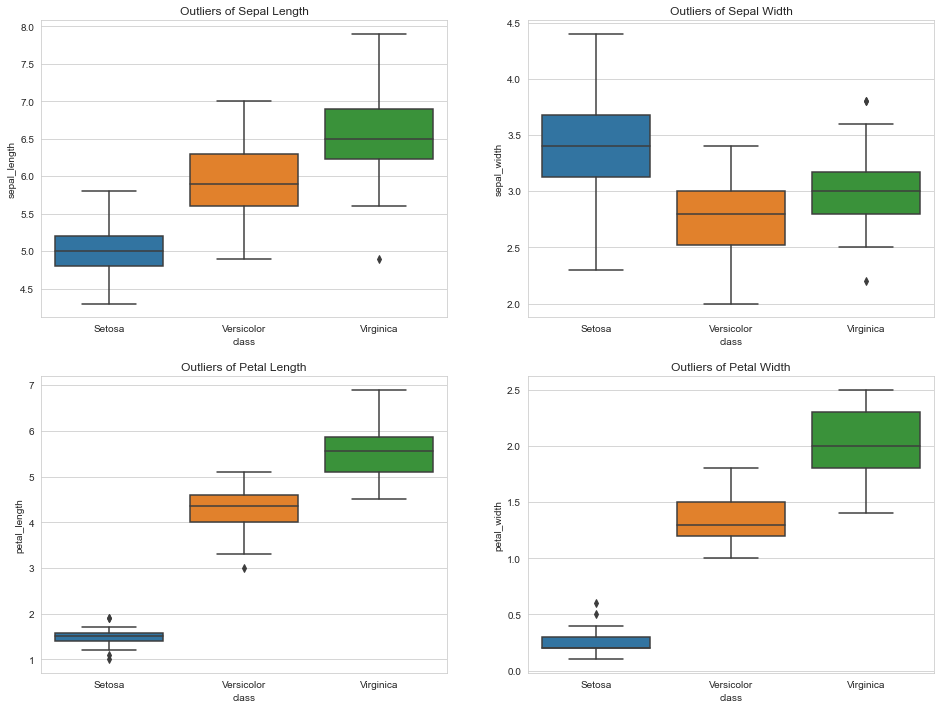

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(16,12))
axes[0,0].set_title("Outliers of Sepal Length")
sns.boxplot(y="sepal_length", x= "class", data=iris,  orient='v' , ax=axes[0, 0])
axes[0,1].set_title("Outliers of Sepal Width")
sns.boxplot(y="sepal_width", x= "class", data=iris,  orient='v' , ax=axes[0, 1])
axes[1,0].set_title("Outliers of Petal Length")
sns.boxplot(y="petal_length", x= "class", data=iris,  orient='v' , ax=axes[1, 0])
axes[1,1].set_title("Outliers of Petal Width")
sns.boxplot(y="petal_width", x= "class", data=iris,  orient='v' , ax=axes[1, 1])
plt.show()

- For Sepal length and Sepal width:
    - Virginica class has outliers
- For Petal:
    - Length:
        - Setosa class and Versicolor class have outliers
    - Width:
        - Setosa class has outliers

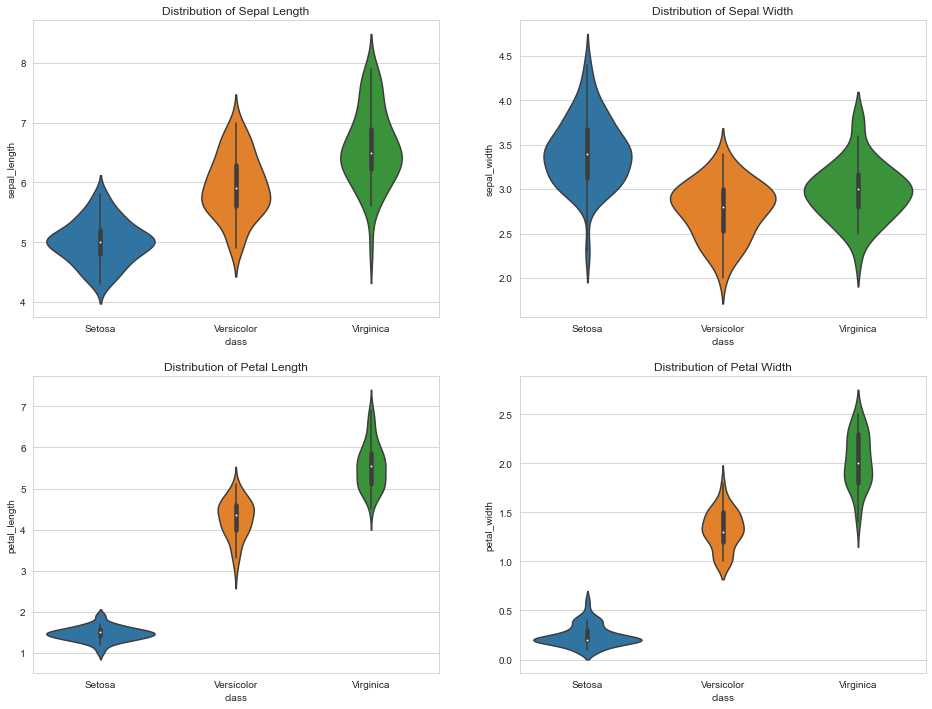

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(16,12))
axes[0,0].set_title("Distribution of Sepal Length")
sns.violinplot(y="sepal_length", x= "class", data=iris,  orient='v' , ax=axes[0, 0])
axes[0,1].set_title("Distribution of Sepal Width")
sns.violinplot(y="sepal_width", x= "class", data=iris,  orient='v' , ax=axes[0, 1])
axes[1,0].set_title("Distribution of Petal Length")
sns.violinplot(y="petal_length", x= "class", data=iris,  orient='v' , ax=axes[1, 0])
axes[1,1].set_title("Distribution of Petal Width")
sns.violinplot(y="petal_width", x= "class", data=iris,  orient='v' , ax=axes[1, 1])
plt.show()

- The kernel density in the Violin plots helps us understand the full distribution of the data in terms of density.

- The dataset is completely balanced i.e. equal number of records are present for each of the three flower classes.

- Our target column is Species, as we need to segregate the flowers as per their species based on the 4 fetaures namely, Sepal Length, Sepal Width, Petal Length and Petal Width.

- The columns Petal length and petal width hold a strong correlation (=0.96) and can be used to segregate the flowers.

- By plotting various graphs, we can conclude that:
    - The Setosa class is easily segregable because of its small feature value range.
    - The Versicolor and Virginca classes are a bit difficult to seperate because they overlap at many points in terms of their features.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [18]:
X = iris.drop(columns='class')
y = iris['class']

In [19]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [20]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


In [21]:
logistic = LogisticRegression()
model = logistic.fit(x_train,y_train)

In [22]:
y_pred = model.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [24]:
print(f'Confusion Matrix: \n\n {confusion_matrix(y_test,y_pred)}')

Confusion Matrix: 

 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [25]:
print(f'Accuracy is: {accuracy_score(y_test,y_pred) *100} %')

Accuracy is: 100.0 %


In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
  Versicolor       1.00      1.00      1.00        13
   Virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

